# Задача 2.2
$f(x) = 10^{-\sqrt{x}}- \sin(\pi \sqrt{x})- 0.9$

$f'(x) = -\frac{1}{2 \sqrt{x}} \left( \ln{(10)} \cdot 10 ^{-\sqrt{x}} + \pi \cos(\pi \sqrt{x})\right)$

In [23]:
import numpy as np
from numpy import abs, sqrt, sin, cos, pi, log
from matplotlib import pyplot as plt 

In [24]:
f = lambda x: 10**(-sqrt(x)) - sin(pi * sqrt(x)) - 0.9
df = lambda x: -1/(2 * sqrt(x)) * (log(10) * 10 ** (-sqrt(x)) + pi * cos(pi * sqrt(x)))
seg = [0, 3]
eps = 10**(-12)

/tmp/ipykernel_1363227/2193261641.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  df = lambda x: -1/(2 * sqrt(x)) * (log(10) * 10 ** (-sqrt(x)) + pi * cos(pi * sqrt(x)))


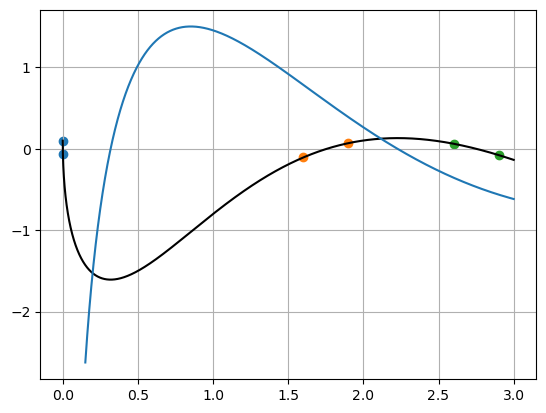

In [33]:
x = np.arange(*seg, 0.0001)
loc = np.array([[0, 0.001], [1.6, 1.9], [2.6, 2.9]])
m1 = np.array([df(loc[0][1]), df(loc[1][0]), df(loc[2][1])])
M1 = np.array([df(loc[0][0]), df(loc[1][1]), df(loc[2][0])])
[plt.scatter(x, f(x)) for x in loc]
plt.plot(x, f(x), "k")
off = 1500
plt.plot(x[off:], df(x[off:]))
plt.grid()

Поиск корней методом Ньютона.
	Выполнено 5 итераций. x = 0.0003437056247207296
	Выполнено 4 итераций. x = 1.7557023174474427
	Выполнено 4 итераций. x = 2.751734381134941


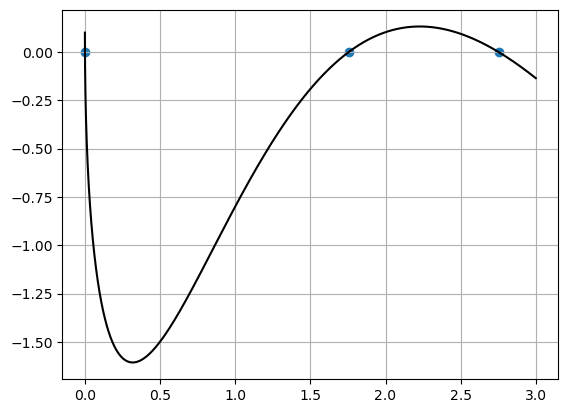

In [43]:
def newton(x0, func, dfunc, eps):
    x1 = x0 - func(x0) / dfunc(x0)
    it = 1
    while abs(x1 - x0) > eps:
        x0 = x1
        x1 = x0 - func(x0) / dfunc(x0)
        # print(f"\t{x1}")
        it += 1
    print(f"\tВыполнено {it} итераций. x = {x1}")
    return x1


x0 = (loc[:, 1] + loc[:, 0])/2
print('Поиск корней методом Ньютона.')
roots = np.array([newton(start, f, df, eps) for start in x0])
plt.scatter(roots, f(roots))
plt.plot(x, f(x), "k")
plt.grid()

Поиск корней методом простых итераций.
	Выполнено 1 итераций. x = 0.0005
	Выполнено 7 итераций. x = 1.7557023174474413
	Выполнено 7 итераций. x = 2.751734381134945


/tmp/ipykernel_1363227/2282981326.py:3: RuntimeWarning: invalid value encountered in scalar divide
  q = abs((M1-m1)/ (M1 + m1))


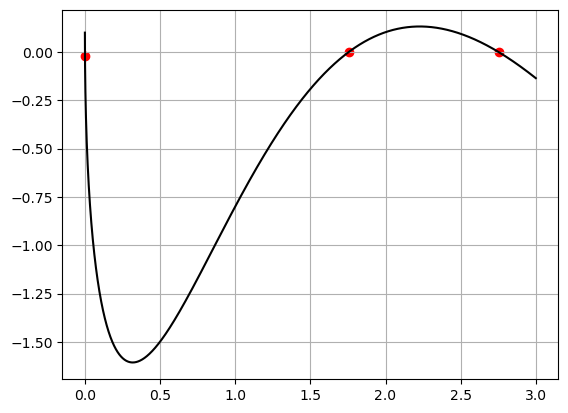

In [45]:
def MPI(x0, m1, M1, f, eps):
    alpha = 2 / (m1 + M1)
    q = abs((M1-m1)/ (M1 + m1))
    x1 = x0 - alpha * f(x0)
    it = 1
    while abs(x1 - x0) > (1 - q) * eps / q:
        x0 = x1
        x1 = x0 - alpha * f(x0)
        it += 1
    
    print(f"\tВыполнено {it} итераций. x = {x1}")
    return x1
print('Поиск корней методом простых итераций.')
mpi_roots = np.array([MPI(start, m , M, f, eps) for start, m, M in zip(x0, m1, M1)])
plt.scatter(mpi_roots, f(mpi_roots), color='r')
plt.plot(x, f(x), "k")
plt.grid()